In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
laboratory_data_df = pd.merge(mouse_metadata,study_results, on ="Mouse ID", how= "inner")
# Display the data table for preview
laboratory_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [80]:
# Checking the number of mice.
num_of_mice = laboratory_data_df["Mouse ID"].nunique()
num_of_mice

249

In [82]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_laboratory_data_df = laboratory_data_df.drop_duplicates(subset= ['Mouse ID'])
clean_laboratory_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [83]:
# Optional: Get all the data for the duplicate mouse ID. 

laboratory_data_df.duplicated(subset=["Mouse ID","Timepoint"])
gb= laboratory_data_df.groupby(["Mouse ID","Timepoint"])["Sex"].count()

double_mice_df = pd.DataFrame(gb).reset_index()
double_mice_df.loc[double_mice_df["Sex"]>1]
#g989

,Mouse ID,Timepoint,Sex
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_laboratory_data_df= laboratory_data_df.loc[laboratory_data_df["Mouse ID"]!= "g989"]

In [85]:
# Checking the number of mice in the clean DataFrame.

clean_laboratory_data_df["Mouse ID"].nunique()


249

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
gb_df= clean_laboratory_data_df.groupby("Drug Regimen").count()

Mean = gb_df["Tumor Volume (mm3)"].mean()

Median = gb_df["Tumor Volume (mm3)"].median()

variance = gb_df["Tumor Volume (mm3)"].var()

standard_deviation = gb_df["Tumor Volume (mm3)"].std()
gb_df.head()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


In [48]:
Summary_df = pd.DataFrame({
    "Drug Regimen": ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],
    "Mean": [40.67, 52.59, 52.88, 55.23, 54.33, 54.03, 52.32, 40.21, 54.23, 53.23,],
    "Median": [41.55, 51.77, 51.82, 53.69, 52.50,52.28, 50.44, 40.67, 52.43, 51.81],
    "Variance": [24.94, 39.29, 43.12, 68.55, 66.17, 61.16, 43.85, 23.48, 59.45, 48.53],
    "Standard Deviation": [4.99, 6.26, 6.56, 8.27, 8.13, 7.82, 6.62, 4.84, 7.71, 6.96]
})
Summarized_df = pd.DataFrame(Summary_df).reset_index()
Summarized_df

,index,Drug Regimen,Mean,Median,Variance,Standard Deviation
0,0,Capomulin,40.67,41.55,24.94,4.99
1,1,Ceftamin,52.59,51.77,39.29,6.26
2,2,Infubinol,52.88,51.82,43.12,6.56
3,3,Ketapril,55.23,53.69,68.55,8.27
4,4,Naftisol,54.33,52.50,66.17,8.13
5,5,Placebo,54.03,52.28,61.16,7.82
6,6,Propriva,52.32,50.44,43.85,6.62
7,7,Ramicane,40.21,40.67,23.48,4.84
8,8,Stelasyn,54.23,52.43,59.45,7.71
9,9,Zoniferol,53.23,51.81,48.53,6.96


In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen




# This method produces everything in a single groupby function

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


Text(0, 0.5, 'Number of Mice')

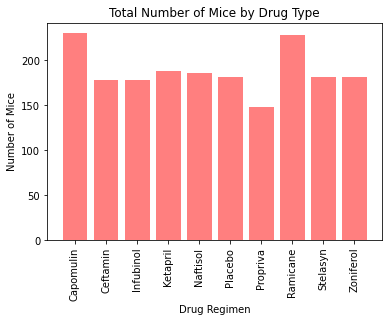

In [61]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Total_Mice = gb_df["Mouse ID"]
x_axis = np.arange(len(gb_df))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, Total_Mice, color='r', alpha=0.5, align="center")


plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo","Propriva", "Ramicane", "Stelasyn", "Zoniferol"],rotation="vertical")

plt.title("Total Number of Mice by Drug Type")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")





In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


(-1.1101410553673794,
 1.1272585351526159,
 -1.1104295916068467,
 1.1228276690280699)

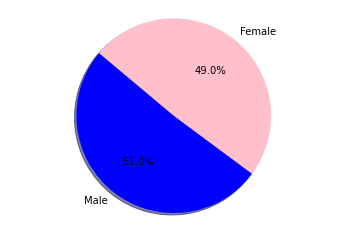

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_df= clean_laboratory_data_df.groupby(["Sex"])["Mouse ID"].count()

labels = ["Male", "Female"]

values = [958,922]

colors = ["Blue", "Pink"]

explode = (0.1, 0, 0, 0)

plt.pie(values,  labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Final_Volume_df = clean_laboratory_data_df.loc[clean_laboratory_data_df["Timepoint"]== 45]
Final_Volume_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_data_df = pd.merge(clean_laboratory_data_df,Final_Volume_df, on ="Mouse ID", how= "inner")
combined_data_df 



,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,Ramicane,Male,21,16,45,22.050126,1
1,k403,Ramicane,Male,21,16,5,38.825898,0,Ramicane,Male,21,16,45,22.050126,1
2,k403,Ramicane,Male,21,16,10,35.014271,1,Ramicane,Male,21,16,45,22.050126,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,Ramicane,Male,21,16,45,22.050126,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,Ramicane,Male,21,16,45,22.050126,1
5,k403,Ramicane,Male,21,16,25,33.464577,1,Ramicane,Male,21,16,45,22.050126,1
6,k403,Ramicane,Male,21,16,30,31.099498,1,Ramicane,Male,21,16,45,22.050126,1
7,k403,Ramicane,Male,21,16,35,26.546993,1,Ramicane,Male,21,16,45,22.050126,1
8,k403,Ramicane,Male,21,16,40,24.365505,1,Ramicane,Male,21,16,45,22.050126,1
9,k403,Ramicane,Male,21,16,45,22.050126,1,Ramicane,Male,21,16,45,22.050126,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen